In [2]:
import h5py
import numpy as np
import pylab as mplot
import astropy.io.fits as pf
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
PSF = pf.open('psf_y1a1-v13.fits')
PSF[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  115 / width of table in bytes                        
NAXIS2  =             14468770 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   16 / number of fields in each row                   
TTYPE1  = 'ra      '           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE2  = 'dec     '           / label for field   2                            
TFORM2  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE3  = 'x       '        

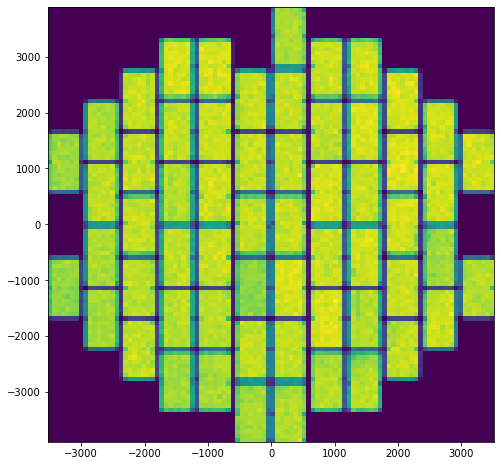

In [8]:
mplot.figure(figsize=(8,8))
X = mplot.hist2d(PSF[1].data['fov_x'], PSF[1].data['fov_y'], bins=(100,100))

In [9]:
X[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
x_edge = X[1]
y_edge = X[2]

In [24]:
PSF_e1_err = np.zeros((100,100))
print(PSF_e1_err)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [25]:
X_fov = PSF[1].data['fov_x']
Y_fov = PSF[1].data['fov_y']
e1 = PSF[1].data['e1']
psf_e1 = PSF[1].data['psf_e1']

for i in range(100):
    for j in range(100):
        mask = (X_fov>=x_edge[i])*(X_fov<x_edge[i+1])*(Y_fov>=y_edge[j])*(Y_fov<y_edge[j+1])
        if len(e1[mask])>0:
            PSF_e1_err[i][j] = np.mean(e1[mask]-psf_e1[mask])
        

[-0.02611214 -0.02605871 -0.0125359  ... -0.0570276  -0.02036899
 -0.02570987]
[-0.01641884 -0.01618173 -0.01815333 ... -0.04524649 -0.02598967
 -0.02934697]


KeyboardInterrupt: 

In [ ]:
mplot.imshow(PSF_e1_err)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-3.52181276e+03, -3.45137718e+03, -3.38094159e+03, -3.31050601e+03,
        -3.24007043e+03, -3.16963484e+03, -3.09919926e+03, -3.02876367e+03,
        -2.95832809e+03, -2.88789251e+03, -2.81745692e+03, -2.74702134e+03,
        -2.67658575e+03, -2.60615017e+03, -2.53571459e+03, -2.46527900e+03,
        -2.39484342e+03, -2.32440783e+03, -2.25397225e+03, -2.18353667e+03,
        -2.11310108e+03, -2.04266550e+03, -1.97222991e+03, -1.90179433e+03,
        -1.83135875e+03, -1.76092316e+03, -1.69048758e+03, -1.62005199e+03,
        -1.54961641e+03, -1.47918082e+03, -1.40874524e+03, -1.33830966e+03,
        -1.26787407e+03, -1.19743849e+03, -1.12700290e+03, -1.05656732e+03,
        -9.86131737e+02, -9.15696153e+02, -8.45260569e+02, -7.74824

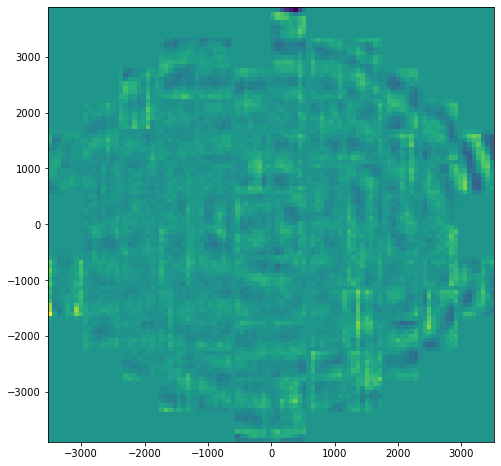

In [27]:
mplot.figure(figsize=(8,8))
mplot.hist2d(PSF[1].data['fov_x'], PSF[1].data['fov_y'], bins=(100,100), weights=e1-psf_e1)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-3.52181276e+03, -3.45137718e+03, -3.38094159e+03, -3.31050601e+03,
        -3.24007043e+03, -3.16963484e+03, -3.09919926e+03, -3.02876367e+03,
        -2.95832809e+03, -2.88789251e+03, -2.81745692e+03, -2.74702134e+03,
        -2.67658575e+03, -2.60615017e+03, -2.53571459e+03, -2.46527900e+03,
        -2.39484342e+03, -2.32440783e+03, -2.25397225e+03, -2.18353667e+03,
        -2.11310108e+03, -2.04266550e+03, -1.97222991e+03, -1.90179433e+03,
        -1.83135875e+03, -1.76092316e+03, -1.69048758e+03, -1.62005199e+03,
        -1.54961641e+03, -1.47918082e+03, -1.40874524e+03, -1.33830966e+03,
        -1.26787407e+03, -1.19743849e+03, -1.12700290e+03, -1.05656732e+03,
        -9.86131737e+02, -9.15696153e+02, -8.45260569e+02, -7.74824

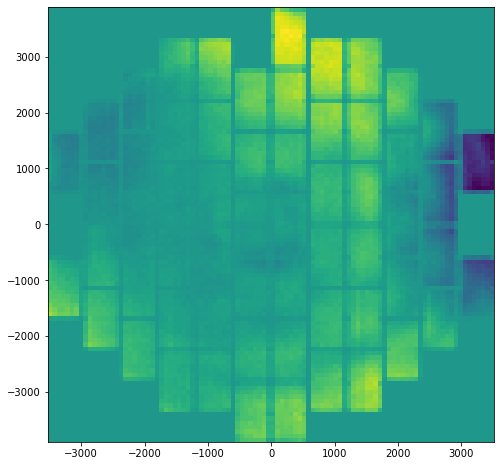

In [28]:
mplot.figure(figsize=(8,8))
mplot.hist2d(PSF[1].data['fov_x'], PSF[1].data['fov_y'], bins=(100,100), weights=e1)